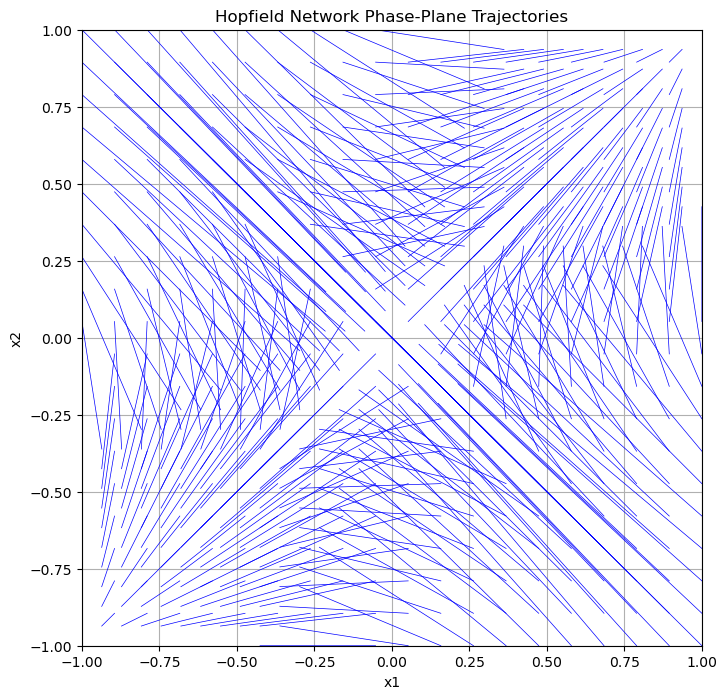

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the weight matrix and bias vector
W = np.array([[0, 1], [1, 0]])
b = np.array([0, 0])

# Define the sigmoid function
def sigmoid(x):
    return (1 - np.exp(-100 * x)) / (1 + np.exp(-100 * x))

# Define the system of ODEs
def hopfield_network(t, x):
    dx1dt = -0.5 * x[0] + 0.5 * (W[0, 0] * sigmoid(x[0]) + W[0, 1] * sigmoid(x[1])) + 0.5 * b[0]
    dx2dt = -0.5 * x[1] + 0.5 * (W[1, 0] * sigmoid(x[0]) + W[1, 1] * sigmoid(x[1])) + 0.5 * b[1]
    return [dx1dt, dx2dt]

# Create a grid of initial conditions
x1_initial = np.linspace(-1, 1, 20)
x2_initial = np.linspace(-1, 1, 20)
initial_conditions = np.array([[x1, x2] for x1 in x1_initial for x2 in x2_initial])

# Plot phase-plane trajectories for various initial conditions
plt.figure(figsize=(8, 8))
for initial_condition in initial_conditions:
    sol = solve_ivp(hopfield_network, [0, 1], initial_condition, t_eval=[0, 1], rtol=1e-8, atol=1e-8)
    plt.plot(sol.y[0], sol.y[1], 'b-', linewidth=0.5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Hopfield Network Phase-Plane Trajectories')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.show()